<style>
*
{
	text-align: justify;
	line-height: 1.5;
	font-family: "Arial", sans-serif;
	font-size: 12px;
}

h2, h3, h4, h5, h6
{
	font-family: "Arial", sans-serif;
	font-size: 12px;
	font-weight: bold;
}
h2
{
	font-size: 14px;
}
h1
{
	font-family: "Wingdings", sans-serif;
	font-size: 16px;
}
</style>

## EDA of Water Levels

<!--
import data_analytics.github as github
print(github.create_jupyter_notebook_header("markcrowe-com", "data-analytics-project-template",
                                            "notebooks/notebook-1-04-eda-water-levels.ipynb"))
-->
<table style="margin: auto;"><tr><td><a href="https://mybinder.org/v2/gh/markcrowe-com/data-analytics-project-template/master?filepath=notebooks/notebook-1-04-eda-water-levels.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open In Binder"/></a></td><td>online editors</td><td><a href="https://colab.research.google.com/github/markcrowe-com/data-analytics-project-template/blob/master/notebooks/notebook-1-04-eda-water-levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></td></tr></table>

### Objective
The objective is to provide an Exploratory Data Analysis (EDA) of the water levels data files. The EDA is performed to investigate and clean the data, to spot anomalies.  Data sourced from [EPA: Water Quality and Monitoring, Groundwater Quality (Excel) 1990 - 2020](https://gis.epa.ie/GetData/Download)
### Setup
Import required third party Python libraries, import supporting functions and sets up data source file paths.

In [1]:
# Local
#!pip install -r script/requirements.txt --quiet
# Remote option
#!pip install -r https://github.com/tahirawwad/agriculture-data-analytics/blob/master/notebooks/script/requirements.txt --quiet

In [2]:
from population_planning.dataframe_labels import *
from population_planning.project_manager import ProjectArtifactManager, ProjectAssetManager
import data_analytics.github as github
import data_analytics.exploratory_data_analysis_reports as eda_reports
import numpy
import os
import pandas
import matplotlib.pyplot as pyplot

In [3]:
artifact_manager = ProjectArtifactManager()
asset_manager = ProjectAssetManager()
artifact_manager.is_remote = asset_manager.is_remote = True
github.display_jupyter_notebook_data_sources([asset_manager.get_population_estimates_filepath()])
artifact_manager.is_remote = asset_manager.is_remote = False

https://github.com/markcrowe-com/population-planning-data-analytics/blob/master/assets/2021-12Dec-11-population-estimates-1950-2021-pea01.csv?raw=true


### Working with population estimates CSV file
#### Create Data Frames

In [4]:
filepath = "./../assets/epa-groundwater-monitoring-data-to-end-2020-circulation-26.05.21.xlsx"

excelWorkbook = pandas.ExcelFile(filepath)
worksheet_name = 'Data'
ground_water_dataframe = excelWorkbook.parse(worksheet_name);

In [5]:
import re as RegularExpression
def camel_to_snakecase(name: str) -> str:
    """
    Convert CamelCase to snake_case
    :param name: string
    :return: snake_case string
    """
    name = RegularExpression.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return RegularExpression.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

def english_to_snakecase(name: str) -> str:
    """
    Convert CamelCase to snake_case
    :param name: string
    :return: snake_case string
    """
    return name.lower().replace(" ", "-")

english_to_snakecase("EPA Groundwater Monitoring Data to End 2020 Circulation 26.05.21")

'epa-groundwater-monitoring-data-to-end-2020-circulation-26.05.21'

#### Renaming Columns

In [6]:
# rename the columns
old_to_new_column_names_dictionary = {
                                      "Age Group" : AGE,
                                      "VALUE" : POPULATION
                                     }
#ground_water_dataframe = ground_water_dataframe.rename(columns = old_to_new_column_names_dictionary)
#ground_water_dataframe.head(0)

### Data Type Analysis Quick View
Print an analysis report of each dataset.  
- Show the top five rows of the data frame as a quick sample.
- Show the data types of each column.
- Report the count of any duplicate rows.
- Report the counts of any missing values.

In [7]:
# A function to vizualize missing data in a DataFrame
from pandas import DataFrame
import matplotlib.pyplot as pyplot
import seaborn 

def calculate_missing_value_stats(dataframe: DataFrame):
    missing_value_stats_dataframe = DataFrame(
        {
            'Missing'   : dataframe.isnull().sum(),
            '% Missing' : dataframe.isnull().sum() / len(dataframe)
        })
    missing_value_stats_dataframe = missing_value_stats_dataframe[missing_value_stats_dataframe['% Missing'] > 0].sort_values(by='Missing', ascending=False)
    return missing_value_stats_dataframe

def viz_missing(missing_value_stats_dataframe: DataFrame) :
    pyplot.subplots(figsize=(40, 30))
    seaborn.barplot(x=missing_value_stats_dataframe.index, y='% Missing', data=missing_value_stats_dataframe)
    pyplot.xticks(rotation=90)
    pyplot.show()

In [36]:
missing_value_stats_dataframe = calculate_missing_value_stats(ground_water_dataframe)

missing_value_stats_dataframe

,Missing,% Missing
Old EU_CD,10041,0.683526
Silver - filtered,9579,0.652076
Total Phosphorus (as P),5584,0.380123
Oxidation Reducing Potential (ORP),5016,0.341457
Orthophosphate (as P) -filtered,4568,0.310960
Silica (as Si),4425,0.301225
Mercury - filtered,3703,0.252076
Strontium - filtered,3679,0.250442
Beryllium - filtered,3595,0.244724
Dissolved Oxygen (on-site).1,3441,0.234241


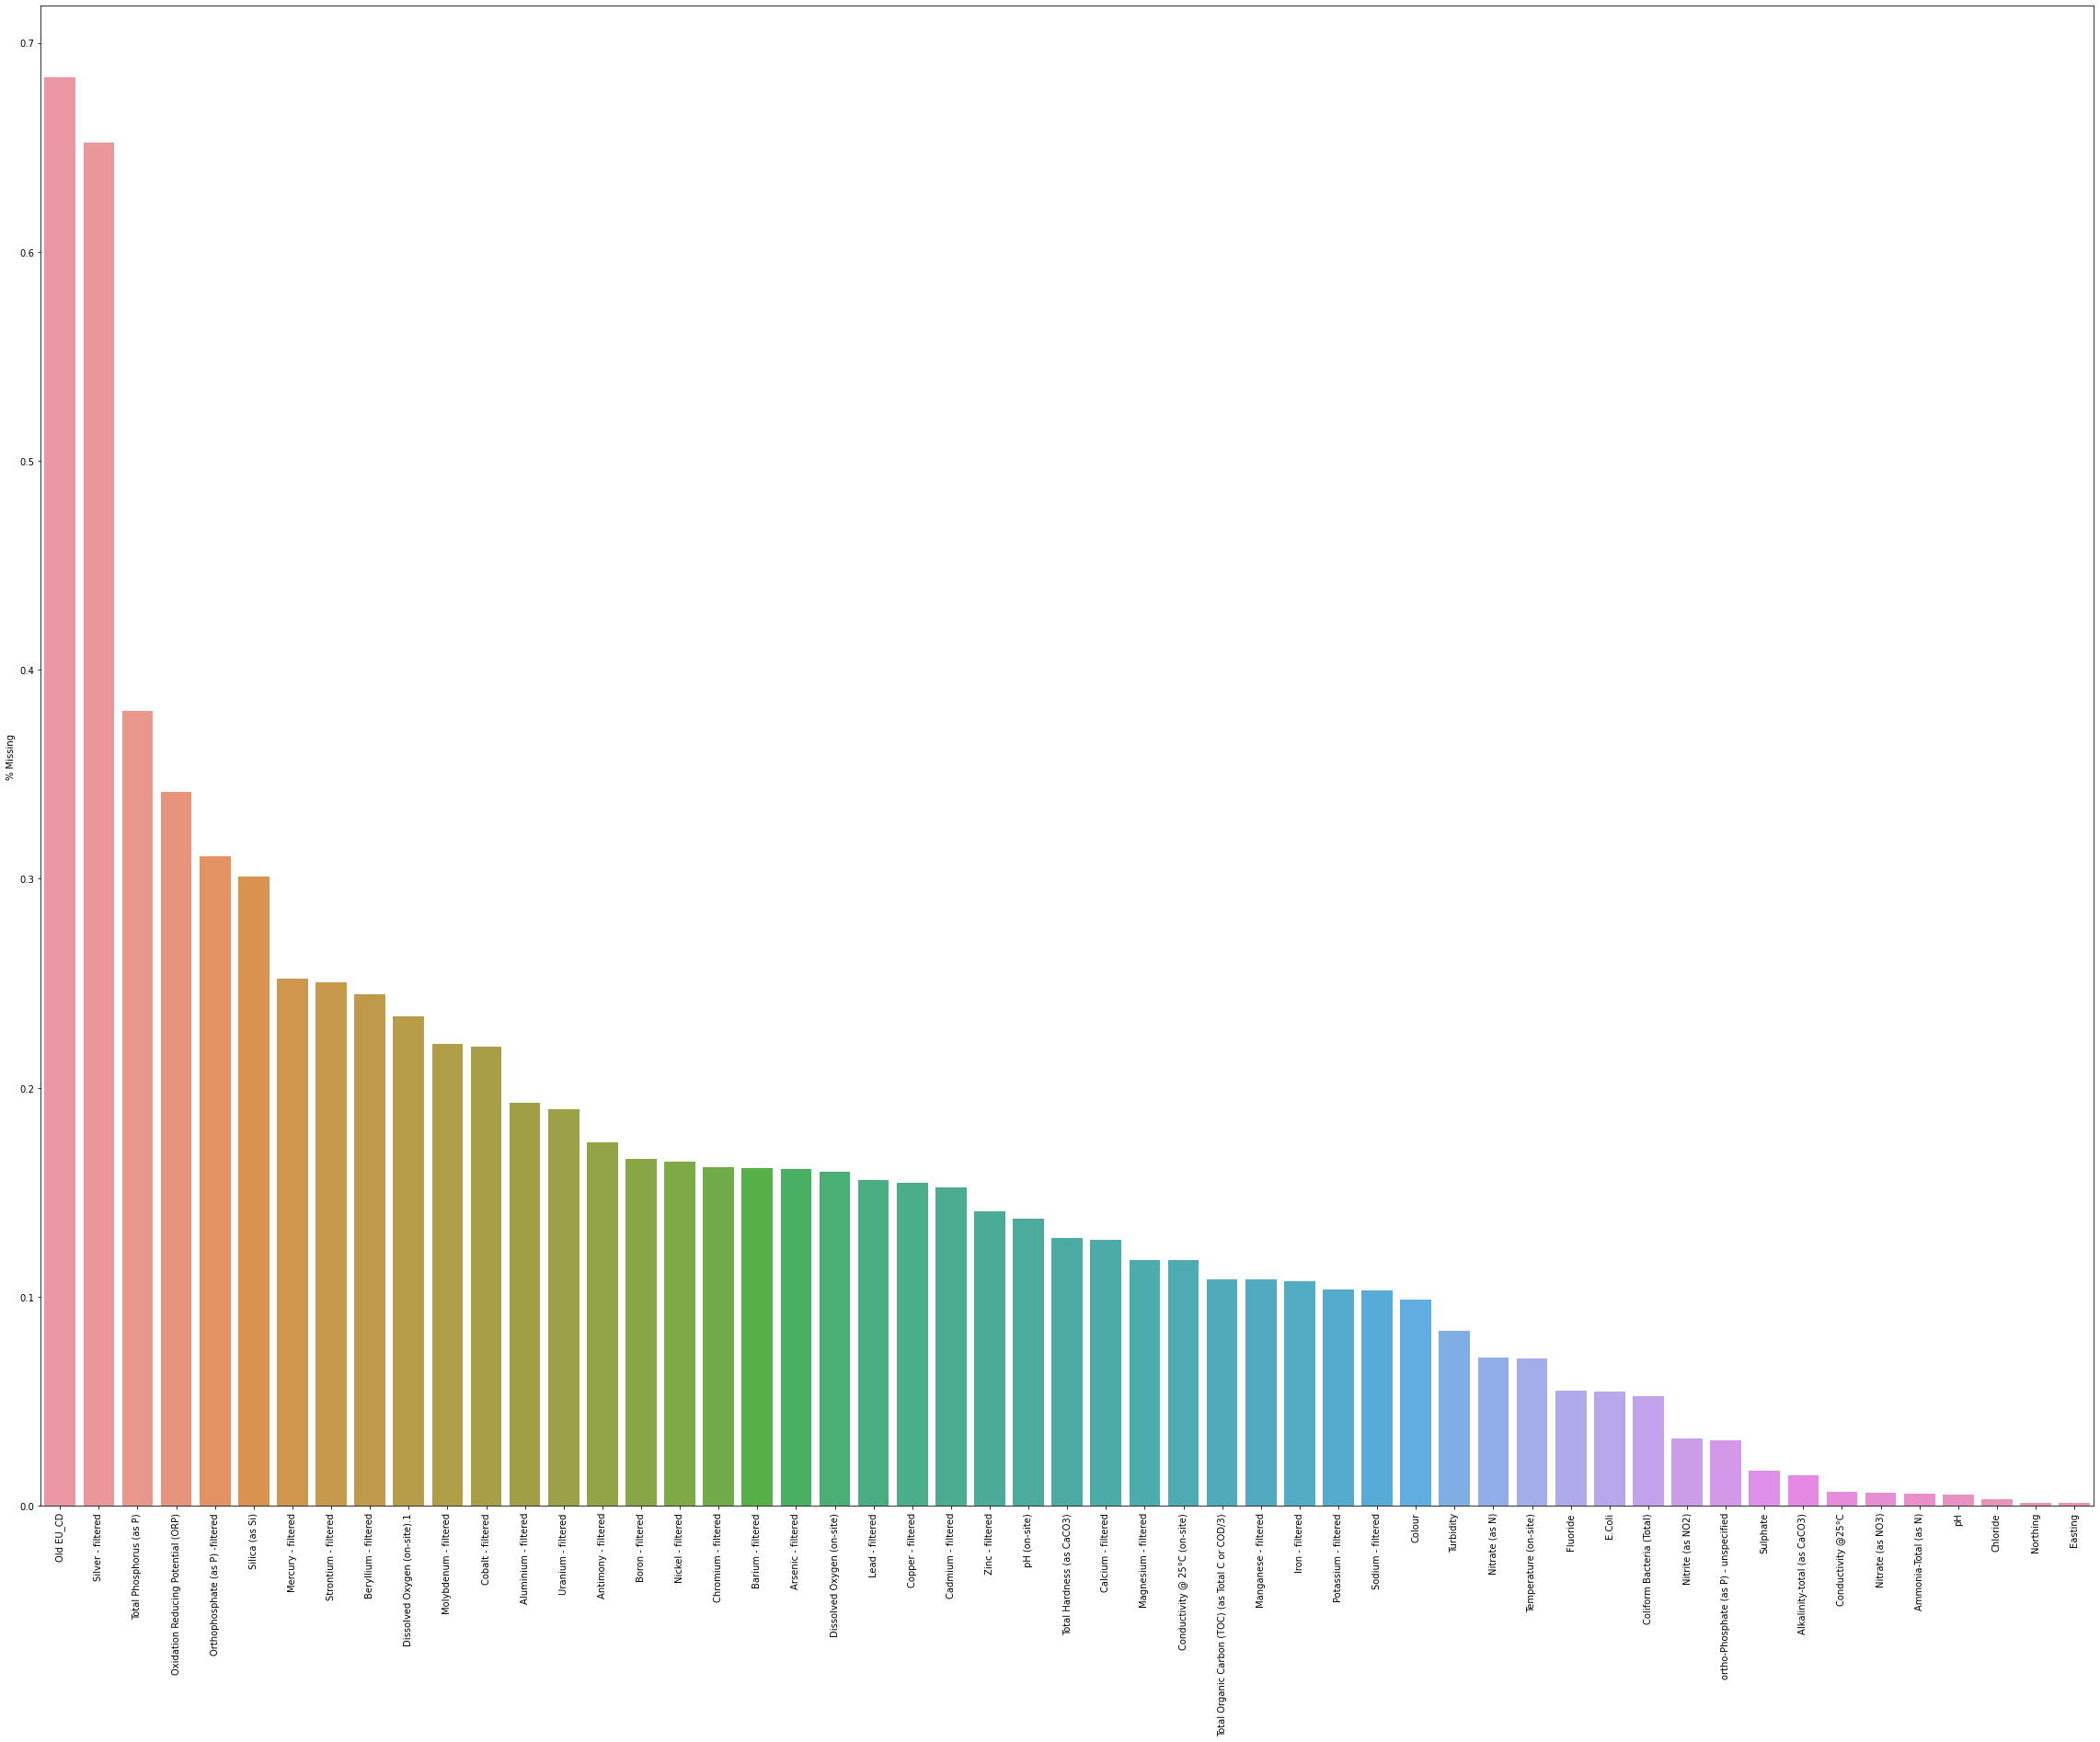

In [37]:
viz_missing(missing_value_stats_dataframe)

In [33]:
columns:list = []
for index, row in missing_value_stats_dataframe.iterrows():
    if row["% Missing"] > .8:
        columns.append(index)
ground_water_dataframe.drop(columns, axis=1, inplace=True)

In [34]:
dataframe_columns = ground_water_dataframe.columns.values.tolist()

print("Columns:", len(dataframe_columns))

for column in dataframe_columns[3:-1]:
    try:
        ground_water_dataframe[column] = ground_water_dataframe[column].astype('int32')
    except:
        print(ground_water_dataframe[column].unique())

Columns: 58
[215540.  90948.  98706.  73677. 102721. 327250. 327570. 263272. 255458.
 131016. 258239. 242124. 155391. 171090. 126474. 121780. 150133. 142378.
 159746. 171700. 112340. 127780. 244819. 113873. 276033. 277876. 281688.
 253943. 245100. 239996. 275487. 277108. 238559. 128080. 335584. 259500.
 253900. 274313. 104400. 340440. 335912. 313702. 278323. 269800. 319820.
 146508. 126492. 121655. 136291. 141209. 179000. 144515. 260374. 200730.
  66200. 211587. 252256. 284812. 257280. 206193. 206300. 130510. 114603.
 136820. 214500. 144556. 262731. 229503. 208800. 150645. 135500. 226609.
 205662. 231663. 146730. 146927. 261878. 114000.  93390. 240445. 258273.
 259773. 252951. 252373. 121637. 219400.  97691.  99325. 162773. 158326.
 170325. 298727. 299500. 307115. 228000. 207672. 203350. 297500. 149600.
 295184. 159150. 161200. 110952. 200841. 318047. 212336. 205809. 104521.
  92840. 197078. 291900. 101027. 302873. 311872.  94709. 200046. 208593.
 245620. 332883. 241369. 363853. 223655

In [14]:
filename = os.path.basename(filepath)

ground_water_dataframe[["Easting", "Northing"]] = ground_water_dataframe[["Easting", "Northing"]].apply(pandas.to_numeric)

In [12]:
ground_water_dataframe.replace("-", numpy.nan, inplace = True)

In [13]:
ground_water_dataframe.replace("--", numpy.nan, inplace = True)

In [15]:
ground_water_dataframe[["Temperature (on-site)"]]= ground_water_dataframe[["Temperature (on-site)"]].apply(pandas.to_numeric)

In [35]:
eda_reports.print_dataframe_analysis_report(ground_water_dataframe, filename)

Row, Column Count: (14690, 58)


,County,Site Name,Easting,Northing,New Code,Old MP Code,Old EU_CD,Sample Date,pH (on-site),Temperature (on-site),...,Antimony - filtered,Barium - filtered,Lead - filtered,Uranium - filtered,Mercury - filtered,Cobalt - filtered,Molybdenum - filtered,Strontium - filtered,Silver - filtered,Beryllium - filtered
0,Kildare,Pollardstown Fen - MB7 (Upper),276810.0,215540.0,IE_SE_G_0106_1400_0014,9014,NaN,2010-06-10,NaN,NaN,...,<0.5,64,<0.5,0.6,<0.05,<0.5,<0.5,203,NaN,<0.5
1,Kildare,Pollardstown Fen - MB7 (Middle),276810.0,215540.0,IE_SE_G_0106_1400_0015,9015,NaN,2010-06-10,NaN,NaN,...,<0.5,19.5,<0.5,1,<0.05,<0.5,<0.5,201,NaN,<0.5
2,Cork,Millstreet PWS (Finnow Spring),126029.0,90948.0,IE_SW_G_0070_0500_0021,4021,NaN,2010-06-14,7.6,11.3,...,<0.5,16.7,<0.5,0.6,<0.05,<0.5,<0.5,62,NaN,<0.5
3,Cork,Banteer PWS (Poulgorm Spring),140013.0,98706.0,IE_SW_G_0018_0500_0004,4004,NaN,2010-06-14,7.2,10.6,...,<0.5,10,<0.5,0.9,<0.05,<0.5,<0.5,86,NaN,<0.5
4,Cork,Coachford Pws (Fr Sheehan Place),145598.0,73677.0,04_010,4010,NaN,2010-06-14,6.7,12.0,...,<0.5,215,<0.5,0.6,<0.05,<0.5,<0.5,86,NaN,<0.5


County                                                      object
Site Name                                                   object
Easting                                                    float64
Northing                                                   float64
New Code                                                    object
Old MP Code                                                  int32
Old EU_CD                                                   object
Sample Date                                         datetime64[ns]
pH (on-site)                                                object
Temperature (on-site)                                      float64
Dissolved Oxygen (on-site)                                  object
Dissolved Oxygen (on-site).1                                object
Conductivity @ 25°C (on-site)                               object
Oxidation Reducing Potential (ORP)                          object
Coliform Bacteria (Total)                                   ob

Number of duplicate rows:  0


County                                                  0
Site Name                                               0
Easting                                                18
Northing                                               18
New Code                                                0
Old MP Code                                             0
Old EU_CD                                           10041
Sample Date                                             0
pH (on-site)                                         2017
Temperature (on-site)                                1037
Dissolved Oxygen (on-site)                           2347
Dissolved Oxygen (on-site).1                         3441
Conductivity @ 25°C (on-site)                        1725
Oxidation Reducing Potential (ORP)                   5016
Coliform Bacteria (Total)                             773
E.Coli                                                801
pH                                                     80
Conductivity @

No single value columns found.


- The column "Northing" has 128 outliers. Recommend removing outliers.
- The column "Temperature (on-site)" has 1025 outliers. Recommend removing outliers.


### Save Artifact
Saving the output of the notebook.

In [ ]:
#population_dataframe.to_csv("./../artifacts/water-levels-cleaned.csv", index=None)

Author &copy; 2021 <a href="https://github.com/markcrowe-com" target="_parent">Mark Crowe</a>. All rights reserved.